# Creating the ML Model

In this model we built different models and see how performance comes each other

# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import talib
import numpy as np
from scipy.stats import f_oneway

# Importing the dataset

In [2]:
df=pd.read_csv("SPY1.csv")

# Describing Dataset

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Inflation,EUR/USD,Gold Price,Brent Oil Prices
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03,5035.000000,5035.000000,5035.000000,5035.000000
mean,197.292312,198.432465,196.041609,197.307110,172.670039,1.228257e+08,2.072971,1.240079,1162.223188,71.355162
std,99.069320,99.622666,98.439046,99.069954,106.305148,9.316535e+07,0.415058,0.125694,461.741635,27.248681
min,67.949997,70.000000,67.099998,68.110001,51.957134,8.055800e+06,0.040000,0.959260,322.200000,9.120000
25%,121.439999,122.084999,120.689999,121.400002,90.869034,6.086990e+07,1.810000,1.132200,792.050000,50.400000
50%,152.850006,153.360001,151.990005,152.619995,120.884598,9.255090e+07,2.160000,1.226100,1239.600000,67.050000
75%,257.750000,259.285004,256.559998,258.235000,237.770119,1.540946e+08,2.370000,1.331605,1512.500000,94.250000
max,479.220001,479.980011,476.059998,477.709991,470.083649,8.710263e+08,3.020000,1.599700,2069.400000,143.950000


# Introducing the columns

In [4]:
column_list=['Open','High','Low','Close','Adj Close','Volume','Inflation','EUR/USD','Gold Price','Brent Oil Prices']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray', 'brown', 'black', 'cyan']

# Getting the value counts

In [5]:
for i in range(0,len(column_list),1):
    print(column_list[i])
    print(df[column_list[i]].value_counts())

Open
126.580002    5
119.699997    4
142.539993    4
129.990005    4
132.089996    4
             ..
141.850006    1
178.539993    1
152.250000    1
409.119995    1
104.000000    1
Name: Open, Length: 4478, dtype: int64
High
129.649994    5
210.250000    4
114.839996    4
140.889999    4
120.650002    4
             ..
435.839996    1
189.050003    1
126.730003    1
210.589996    1
85.000000     1
Name: High, Length: 4437, dtype: int64
Low
139.000000    5
111.000000    4
133.839996    4
113.180000    4
116.720001    4
             ..
154.119995    1
207.080002    1
203.699997    1
198.110001    1
108.769997    1
Name: Low, Length: 4418, dtype: int64
Close
131.970001    6
117.430000    4
131.470001    4
112.580002    4
126.849998    3
             ..
113.650002    1
155.830002    1
173.220001    1
298.279999    1
98.000000     1
Name: Close, Length: 4445, dtype: int64
Adj Close
79.095451     3
116.569557    3
84.957870     3
74.154915     3
109.598228    2
             ..
206.179840    

# Checking for Null Values

In [6]:
df['Inflation'].isnull().values.any()

False

# Removing outliers

 Removing outliers was not done in this task, because stock market is a very volatile one so it can change anytime also the parameters which were considered can also change suddenly, So removing a data naming outliers will create wrong instance of data.

# Plotting Features vs Time

# Finding the correlation between features

In [7]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Inflation,EUR/USD,Gold Price,Brent Oil Prices
Open,1.000000,0.999911,0.999883,0.999807,0.998580,-0.298461,0.019707,-0.556168,0.683117,0.040402
High,0.999911,1.000000,0.999802,0.999873,0.998800,-0.294196,0.017941,-0.556389,0.683677,0.040332
Low,0.999883,0.999802,1.000000,0.999889,0.998488,-0.304523,0.021421,-0.556182,0.682537,0.040216
Close,0.999807,0.999873,0.999889,1.000000,0.998755,-0.299916,0.019522,-0.556312,0.683184,0.040193
Adj Close,0.998580,0.998800,0.998488,0.998755,1.000000,-0.279380,-0.003675,-0.560219,0.702623,0.043873
Volume,-0.298461,-0.294196,-0.304523,-0.299916,-0.279380,1.000000,-0.300486,0.449186,0.081526,0.276081
Inflation,0.019707,0.017941,0.021421,0.019522,-0.003675,-0.300486,1.000000,0.254776,-0.102569,0.449852
EUR/USD,-0.556168,-0.556389,-0.556182,-0.556312,-0.560219,0.449186,0.254776,1.000000,-0.178813,0.509041
Gold Price,0.683117,0.683677,0.682537,0.683184,0.702623,0.081526,-0.102569,-0.178813,1.000000,0.464292
Brent Oil Prices,0.040402,0.040332,0.040216,0.040193,0.043873,0.276081,0.449852,0.509041,0.464292,1.000000


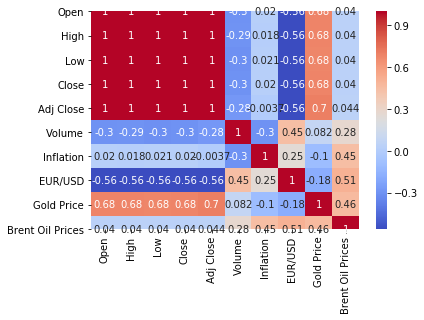

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Adding Technical Indicators 

Some Most useful technical indicators are also added for this task and its added in the signal mode becuase researches suggest that converting them to signals make it much easier to process.

# SMA

(5035,)


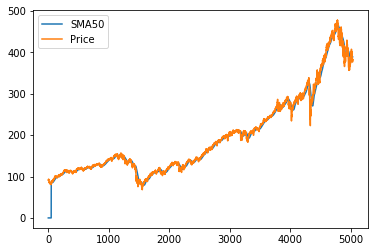

In [9]:
sma50= talib.SMA(df['Close'].values, 50)
print(sma50.shape)
sma_50_list=[]
sma50[np.isnan(sma50)] = 0
plt.plot(sma50,label='SMA50')
plt.plot(df['Close'].values,label='Price')
plt.legend(loc='best')

In [10]:
for sma in range (0,len(sma50)-1,1):
    if sma50[sma]<sma50[sma+1]:
        #sma50[sma] = 1
        sma_50_list.append(1)
    else:
        #sma50[sma] = 0
        sma_50_list.append(0)

In [11]:
sma_50_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
df.insert(loc=10, column='SMA', value=pd.Series(sma_50_list))

# RSI

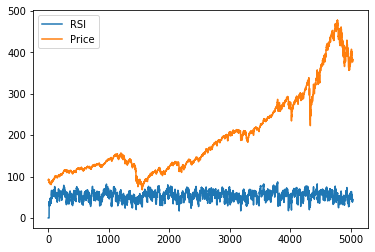

In [13]:
rsi200= talib.RSI(df['Close'].values)
rsi200_list=[]
rsi200[np.isnan(rsi200)] = 0
plt.plot(rsi200,label='RSI')
plt.plot(df['Close'].values,label='Price')
plt.legend(loc='best')

In [14]:
print(rsi200.shape)

(5035,)


In [15]:
rsi200[300]

41.38230529755473

In [16]:
for rsi in range (0,len(rsi200)-1,1):
    
    if rsi200[rsi]<rsi200[rsi+1]:
        #sma50[sma] = 1
        rsi200[rsi]
        rsi200_list.append(1)
    else:
        #sma50[sma] = 0
        rsi200_list.append(0)

In [17]:
rsi200_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [18]:
df.insert(loc=11, column='RSI', value=pd.Series(rsi200_list))

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation,EUR/USD,Gold Price,SMA,RSI,Brent Oil Prices
0,1/2/2003,88.849998,91.300003,88.540001,91.070000,62.047668,44516300,1.64,1.03660,346.50,0.0,0.0,30.32
1,1/3/2003,90.910004,91.379997,90.500000,91.349998,62.238476,32222600,1.62,1.04280,351.60,0.0,0.0,31.43
2,1/6/2003,91.239998,93.489998,91.169998,92.959999,63.335392,40984500,1.62,1.04470,352.10,0.0,0.0,31.43
3,1/7/2003,92.900002,93.370003,92.199997,92.730003,63.178707,38640400,1.63,1.04050,347.70,0.0,0.0,30.78
4,1/8/2003,92.199997,92.400002,91.050003,91.389999,62.265690,38702200,1.62,1.05010,354.30,0.0,0.0,29.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,12/23/2022,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,2.20,1.06150,1798.90,1.0,0.0,79.58
5031,12/27/2022,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,2.26,1.06335,1805.55,1.0,0.0,82.45
5032,12/28/2022,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,2.28,1.06115,1808.00,1.0,1.0,81.70
5033,12/29/2022,379.630005,384.350006,379.079987,383.440002,383.440002,66970900,2.27,1.06603,1804.20,1.0,0.0,80.96


In [20]:
df=df.dropna()

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation,EUR/USD,Gold Price,SMA,RSI,Brent Oil Prices
0,1/2/2003,88.849998,91.300003,88.540001,91.070000,62.047668,44516300,1.64,1.03660,346.50,0.0,0.0,30.32
1,1/3/2003,90.910004,91.379997,90.500000,91.349998,62.238476,32222600,1.62,1.04280,351.60,0.0,0.0,31.43
2,1/6/2003,91.239998,93.489998,91.169998,92.959999,63.335392,40984500,1.62,1.04470,352.10,0.0,0.0,31.43
3,1/7/2003,92.900002,93.370003,92.199997,92.730003,63.178707,38640400,1.63,1.04050,347.70,0.0,0.0,30.78
4,1/8/2003,92.199997,92.400002,91.050003,91.389999,62.265690,38702200,1.62,1.05010,354.30,0.0,0.0,29.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,12/22/2022,383.049988,386.209991,374.769989,380.720001,380.720001,100120900,2.19,1.05934,1792.70,1.0,1.0,80.25
5030,12/23/2022,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,2.20,1.06150,1798.90,1.0,0.0,79.58
5031,12/27/2022,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,2.26,1.06335,1805.55,1.0,0.0,82.45
5032,12/28/2022,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,2.28,1.06115,1808.00,1.0,1.0,81.70


In [22]:
df = df.reindex(columns=['Date', 'Open', 'High','Low','Adj Close','Volume','Inflation','EUR/USD','Gold Price','Brent Oil Prices','SMA','RSI','Close'])

In [23]:
df

,Date,Open,High,Low,Adj Close,Volume,Inflation,EUR/USD,Gold Price,Brent Oil Prices,SMA,RSI,Close
0,1/2/2003,88.849998,91.300003,88.540001,62.047668,44516300,1.64,1.03660,346.50,30.32,0.0,0.0,91.070000
1,1/3/2003,90.910004,91.379997,90.500000,62.238476,32222600,1.62,1.04280,351.60,31.43,0.0,0.0,91.349998
2,1/6/2003,91.239998,93.489998,91.169998,63.335392,40984500,1.62,1.04470,352.10,31.43,0.0,0.0,92.959999
3,1/7/2003,92.900002,93.370003,92.199997,63.178707,38640400,1.63,1.04050,347.70,30.78,0.0,0.0,92.730003
4,1/8/2003,92.199997,92.400002,91.050003,62.265690,38702200,1.62,1.05010,354.30,29.30,0.0,0.0,91.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,12/22/2022,383.049988,386.209991,374.769989,380.720001,100120900,2.19,1.05934,1792.70,80.25,1.0,1.0,380.720001
5030,12/23/2022,379.649994,383.059998,378.029999,382.910004,59857300,2.20,1.06150,1798.90,79.58,1.0,0.0,382.910004
5031,12/27/2022,382.790009,383.149994,379.649994,381.399994,51638200,2.26,1.06335,1805.55,82.45,1.0,0.0,381.399994
5032,12/28/2022,381.329987,383.390015,376.420013,376.660004,70911500,2.28,1.06115,1808.00,81.70,1.0,1.0,376.660004


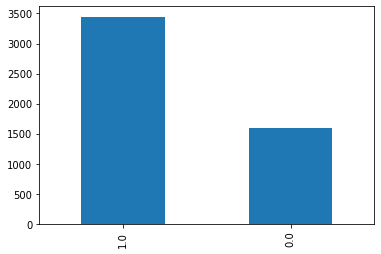

In [24]:
import matplotlib.pyplot as plt 
df['SMA'].value_counts()[:0].plot(kind='bar')

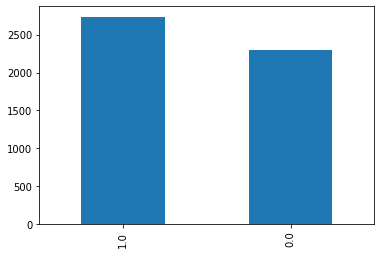

In [25]:
import matplotlib.pyplot as plt 
df['RSI'].value_counts()[:0].plot(kind='bar')

# Dropping columns based on Dimensionality Reduction

We will drop AdjClose,Volume,Open,Low values in first instance becuase they are highliy correlated and studies show that they are not much affcted for close values.

In [24]:
df.drop(['Adj Close', 'Volume', 'Low'], axis=1, inplace=True)

In [25]:
df

,Date,Open,High,Inflation,EUR/USD,Gold Price,Brent Oil Prices,SMA,RSI,Close
0,1/2/2003,88.849998,91.300003,1.64,1.03660,346.50,30.32,0.0,0.0,91.070000
1,1/3/2003,90.910004,91.379997,1.62,1.04280,351.60,31.43,0.0,0.0,91.349998
2,1/6/2003,91.239998,93.489998,1.62,1.04470,352.10,31.43,0.0,0.0,92.959999
3,1/7/2003,92.900002,93.370003,1.63,1.04050,347.70,30.78,0.0,0.0,92.730003
4,1/8/2003,92.199997,92.400002,1.62,1.05010,354.30,29.30,0.0,0.0,91.389999
...,...,...,...,...,...,...,...,...,...,...
5029,12/22/2022,383.049988,386.209991,2.19,1.05934,1792.70,80.25,1.0,1.0,380.720001
5030,12/23/2022,379.649994,383.059998,2.20,1.06150,1798.90,79.58,1.0,0.0,382.910004
5031,12/27/2022,382.790009,383.149994,2.26,1.06335,1805.55,82.45,1.0,0.0,381.399994
5032,12/28/2022,381.329987,383.390015,2.28,1.06115,1808.00,81.70,1.0,1.0,376.660004


In [26]:
df['SMA'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033],
           dtype='int64', length=5034)

# Converting df into numpy array for multivariate analysis

In [ ]:
data=df[:,1:9]
target=df[:,9]

trainX = []
trainY = []

n_future = 1   
n_past = 14  

for i in range(n_past, len(data) - n_future +1):
    trainX.append(data[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

# Converting df into numpy array

In [357]:
#converting into a numpy array
df=df.as_matrix() 

C:\Users\Ayodhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [361]:
data=df[:,1:9]
target=df[:,9]

In [362]:
target.shape

(5034,)

# Save the numpy array

In [364]:
np.save('data.npy', data)
np.save('target.npy', target)